In [3]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housingFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\housing_data.xlsx'
popFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\population_data.csv'
immiFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\immigration_data.csv'

housingDf = pd.read_excel(housingFilePath, sheet_name="Aggregate")
print(housingDf.head())
housingDf['Date'] = pd.to_datetime(housingDf['Date'])

housingDf['year'] = housingDf['Date'].dt.year
housingDf['month'] = housingDf['Date'].dt.month
housingDf['yearMonth'] = housingDf['Date'].dt.strftime('%Y-%m')
print(housingDf.head())

        Date  Composite_HPI  Single_Family_HPI  One_Storey_HPI  \
0 2005-01-01          100.0              100.0           100.0   
1 2005-02-01          101.0              101.0           101.2   
2 2005-03-01          102.1              102.1           102.4   
3 2005-04-01          103.1              103.2           103.8   
4 2005-05-01          103.8              103.9           104.7   

   Two_Storey_HPI  Townhouse_HPI  Apartment_HPI  Composite_Benchmark  \
0           100.0          100.0          100.0               236400   
1           100.9          100.9          101.2               238800   
2           101.9          101.7          102.2               241300   
3           102.9          102.4          103.1               243800   
4           103.3          103.2          104.1               245400   

   Single_Family_Benchmark  One_Storey_Benchmark  Two_Storey_Benchmark  \
0                   256600                204100                299000   
1                   25

In [5]:
popDf = pd.read_csv(popFilePath)
print(popDf.head())

  REF_DATE     GEO           DGUID      UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
0  2000-01  Canada  2016A000011124  Persons     249         units          0   
1  2000-04  Canada  2016A000011124  Persons     249         units          0   
2  2000-07  Canada  2016A000011124  Persons     249         units          0   
3  2000-10  Canada  2016A000011124  Persons     249         units          0   
4  2001-01  Canada  2016A000011124  Persons     249         units          0   

  VECTOR  COORDINATE     VALUE  STATUS  SYMBOL  TERMINATED  DECIMALS  
0     v1           1  30525872     NaN     NaN         NaN         0  
1     v1           1  30594030     NaN     NaN         NaN         0  
2     v1           1  30685730     NaN     NaN         NaN         0  
3     v1           1  30783969     NaN     NaN         NaN         0  
4     v1           1  30824441     NaN     NaN         NaN         0  


In [7]:
immiDf = pd.read_csv(immiFilePath)
immiDf['yearStart'] = immiDf['REF_DATE'].str.split("/").str[0]
immiDf['yearEnd'] = immiDf['REF_DATE'].str.split("/").str[1]
print(immiDf.head())

    REF_DATE     GEO           DGUID Components of population growth      UOM  \
0  2000/2001  Canada  2016A000011124                          Births  Persons   
1  2001/2002  Canada  2016A000011124                          Births  Persons   
2  2002/2003  Canada  2016A000011124                          Births  Persons   
3  2003/2004  Canada  2016A000011124                          Births  Persons   
4  2004/2005  Canada  2016A000011124                          Births  Persons   

   UOM_ID SCALAR_FACTOR  SCALAR_ID   VECTOR  COORDINATE     VALUE STATUS  \
0     249         units          0  v391069         1.1  327487.0    NaN   
1     249         units          0  v391069         1.1  329131.0    NaN   
2     249         units          0  v391069         1.1  331640.0    NaN   
3     249         units          0  v391069         1.1  339351.0    NaN   
4     249         units          0  v391069         1.1  341833.0    NaN   

   SYMBOL  TERMINATED  DECIMALS yearStart yearEnd  
0   

In [11]:
#Take only population data for Canada
#Take only population from the same year as housing data since housing data is available only from 2005
selectedPopData = popDf[popDf["GEO"] == "Canada"]
#selectedPopData = selectedPopData[selectedPopData["REF_DATE"].isin(housingDf["yearMonth"])]
selectedPopData = selectedPopData.loc[selectedPopData['REF_DATE'].eq('2005-01').idxmax():selectedPopData['REF_DATE'].eq('2023-10').idxmax()]
print(selectedPopData)

#Take only housing data with same date as housing data is available for each month starting from 2005
selectedHousingData = housingDf[housingDf["yearMonth"].isin(selectedPopData["REF_DATE"])]
print(selectedHousingData)

   REF_DATE     GEO           DGUID      UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
20  2005-01  Canada  2016A000011124  Persons     249         units          0   
21  2005-04  Canada  2016A000011124  Persons     249         units          0   
22  2005-07  Canada  2016A000011124  Persons     249         units          0   
23  2005-10  Canada  2016A000011124  Persons     249         units          0   
24  2006-01  Canada  2016A000011124  Persons     249         units          0   
..      ...     ...             ...      ...     ...           ...        ...   
91  2022-10  Canada  2016A000011124  Persons     249         units          0   
92  2023-01  Canada  2016A000011124  Persons     249         units          0   
93  2023-04  Canada  2016A000011124  Persons     249         units          0   
94  2023-07  Canada  2016A000011124  Persons     249         units          0   
95  2023-10  Canada  2016A000011124  Persons     249         units          0   

   VECTOR  COORDINATE     V

In [13]:
X = selectedPopData["VALUE"]
X

20    32075011
21    32140569
22    32242732
23    32353311
24    32394909
        ...   
91    39279501
92    39527986
93    39748878
94    40083484
95    40513781
Name: VALUE, Length: 76, dtype: int64

In [15]:
y = selectedHousingData["Composite_Benchmark"]
y

0      236400
3      243800
6      248400
9      253100
12     258600
        ...  
213    720200
216    701800
219    739300
222    753900
225    727500
Name: Composite_Benchmark, Length: 76, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False, )
#X_train = pd.DataFrame(X_train)
X_train = X_train.to_frame()
y_train = y_train.to_frame()

X_test = X_test.to_frame()
y_test = y_test.to_frame()
print(type(X_train), type(y_train), type(X_test), type(y_test), len(y_test 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> 16


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

[[569239.42760669]
 [573713.97071797]
 [574947.05166098]
 [574877.03480511]
 [576632.28691023]
 [581328.1332981 ]
 [586951.41886692]
 [598716.01244062]
 [605488.15413069]
 [612102.92839065]
 [626510.37411408]
 [646035.92697141]
 [660157.7925806 ]
 [672711.49657942]
 [691727.77910766]
 [716182.35948893]]


In [45]:
type(y_pred)

numpy.ndarray

In [23]:
mse = mean_squared_error(y_test, y_pred)
mse

10392735760.603586

In [25]:
slope = model.coef_[0]
slope

array([0.05683186])

In [27]:
intercept = model.intercept_
intercept

array([-1586291.3133778])

In [29]:
r_sq = model.score(X_train, y_train)
r_sq

0.9201973132907969

In [99]:
#type(y_pred)
#pd.DataFrame(data = y_pred[1:,1:], index=y_pred[1:,0], columns=y_pred[0,1:])
y_test

,Composite_Benchmark
180,532700
183,543600
186,559000
189,579000
192,612000
195,680000
198,691100
201,726700
204,801800
207,840100


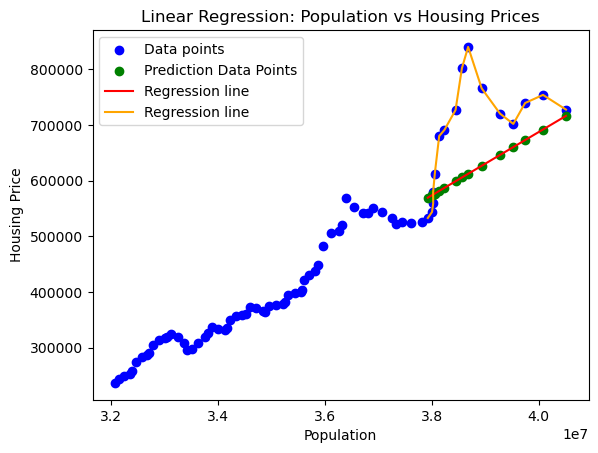

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.subplot(1,2,1)
plt.scatter(X, y, color='blue', label='Data points')  # Original data points
plt.scatter(X_test,y_pred, color = 'green', label = 'Prediction Data Points')
#sns.scatterplot(x = X_test["VALUE"], y = y_test["Composite_Benchmark"])
plt.plot(X_test, y_pred, color='red', label='Regression line')  # Regression line

plt.plot(X_test, y_test, color='orange', label='Regression line')  # Regression line
plt.xlabel('Population')
plt.ylabel('Housing Price')
plt.title('Linear Regression: Population vs Housing Prices')
plt.legend()
plt.show()

In [ ]:
#take only federal level data
#consider only immigrants
#start from 2005, housing data is avalable only from 2005
selectedImmiData = immiDf[immiDf["GEO"] == "Canada"]
selectedImmiData = selectedImmiData[selectedImmiData['Components of population growth'] == 'Immigrants']
selectedImmiData = selectedImmiData.loc[selectedImmiData['REF_DATE'].eq('2005/2006').idxmax():]
selectedImmiData


In [123]:
#choose only first month from housing data to match the time range from immigration data
housingImmiData = housingDf[housingDf['month'] == 1]
housingImmiData = housingImmiData.loc[housingImmiData['year'].eq(2005).idxmax():housingImmiData['year'].eq(2023).idxmax()]
housingImmiData

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,year,month,yearMonth
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,236400,256600,204100,299000,198800,169900,2005,1,2005-01
12,2006-01-01,109.4,109.2,110.2,108.4,109.6,110.8,258600,280200,225000,324000,217900,188300,2006,1,2006-01
24,2007-01-01,122.7,121.9,126.0,119.3,127.4,126.4,290100,312700,257100,356600,253300,214800,2007,1,2007-01
36,2008-01-01,134.9,133.9,139.1,130.4,139.9,140.7,318900,343500,283900,390000,278100,239000,2008,1,2008-01
48,2009-01-01,124.7,123.7,128.2,120.6,131.5,129.4,294900,317500,261600,360700,261400,219800,2009,1,2009-01
60,2010-01-01,137.8,136.8,137.9,134.8,142.4,145.3,325800,351000,281500,403100,283100,246800,2010,1,2010-01
72,2011-01-01,141.4,140.8,139.2,139.9,144.9,147.3,334300,361400,284100,418400,288100,250300,2011,1,2011-01
84,2012-01-01,152.5,153.5,149.3,153.3,150.9,153.7,360500,394000,304700,458400,299900,261100,2012,1,2012-01
96,2013-01-01,153.8,155.2,151.2,155.0,151.8,151.2,363700,398200,308700,463500,301700,256900,2013,1,2013-01
108,2014-01-01,161.4,163.4,158.6,163.4,156.4,155.2,381600,419200,323800,488700,310900,263700,2014,1,2014-01


In [125]:
A_train, A_test, b_train, b_test = train_test_split(selectedImmiData['VALUE'], housingImmiData['Composite_Benchmark'], test_size=0.2, random_state=42, shuffle = False )
A_train = A_train.to_frame()
A_test = A_test.to_frame()
b_train = b_train.to_frame()
b_test = b_test.to_frame()
A_train
len(A_train.index)

15

In [127]:
b_train
len(A_test)

4

In [129]:
immiModel = LinearRegression()
immiModel.fit(A_train,b_train)

LinearRegression()

In [131]:
immiHousingPrediction = immiModel.predict(A_test)
immiHousingPrediction

array([[255326.20665034],
       [980947.17117301],
       [914825.6872935 ],
       [902190.21234913]])

In [133]:
immiMSE = mean_squared_error(b_train[0:len(immiHousingPrediction)],immiHousingPrediction)
immiMSE

313163323296.61304

In [137]:
immiSlope = immiModel.coef_[0]
immiSlope

array([2.71847568])

In [139]:
immiIntercept = immiModel.intercept_
immiIntercept

array([-359902.89760103])

In [179]:
len(selectedImmiData), len(housingImmiData), len(immiHousingPrediction), A_test

(19,
 19,
 4,
        VALUE
 68  226314.0
 69  493236.0
 70  468913.0
 71  464265.0)

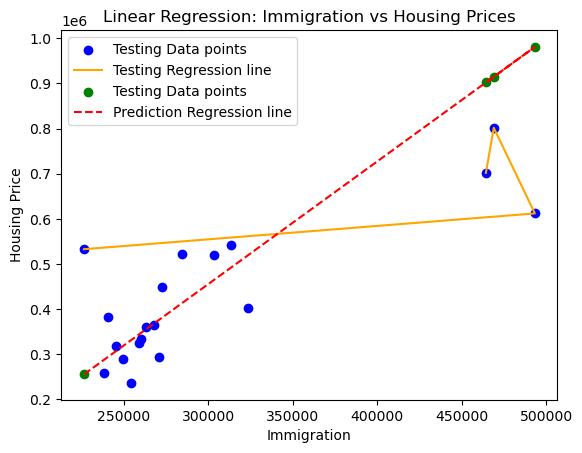

In [187]:
#plt.scatter(selectedImmiData["VALUE"], housingImmiData["Composite_Benchmark"], color='blue', label='Training Data points')  # Original data points
plt.scatter(selectedImmiData["VALUE"], housingImmiData["Composite_Benchmark"], color='blue', label='Testing Data points')  # Original data points
plt.plot(A_test, b_test, color='orange', label='Testing Regression line')  # Regression line

plt.scatter(A_test, immiHousingPrediction, color='green', label='Testing Data points')  # Original data points
plt.plot(A_test, immiHousingPrediction, color='red', linestyle='--', label='Prediction Regression line')  # Regression line

plt.xlabel('Immigration')
plt.ylabel('Housing Price')
plt.title('Linear Regression: Immigration vs Housing Prices')
plt.legend()
plt.show()